# **Introduction To Deep Learning**
# **Mini Project - 2**

#**Student Number - PS/2019/043**
#**Name - S.P. Perera**

**Selected Company - Expo Lanka holdings**

The Historical Share Price Data from 01/26/ 2019 to 25/02/2024

 LSTM – RNN model  to forecast stock price values

# **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# **Mount Google Drive**

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')

Mounted at /content/drive


# **Specify the path to the CSV file of the dataset on Google Drive**

In [8]:
file_path = '/content/drive/My Drive/Deep Learning/PS-2019-043-MiniProject2/EXPO Historical Data.csv'

# **Load data**

In [9]:
data = pd.read_csv(file_path)
prices = data['Price'].values.reshape(-1, 1)

# **Normalize data**

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# **Split data into training and testing sets**

In [11]:
split_ratio = 0.8
split_index = int(len(prices_normalized) * split_ratio)
train_data = prices_normalized[:split_index]
test_data = prices_normalized[split_index:]

# **Prepare Data for LSTM**

In [12]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input data to be in the form [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# **Build LSTM Model**

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
30/30 [==============================] - 8s 17ms/step - loss: 0.0302
Epoch 2/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 3/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0024
Epoch 4/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 5/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 6/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 7/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0023
Epoch 8/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 9/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 10/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 11/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 12/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 13/50
30/30 [==================

# **Predictions**

8/8 [==============================] - 1s 8ms/step


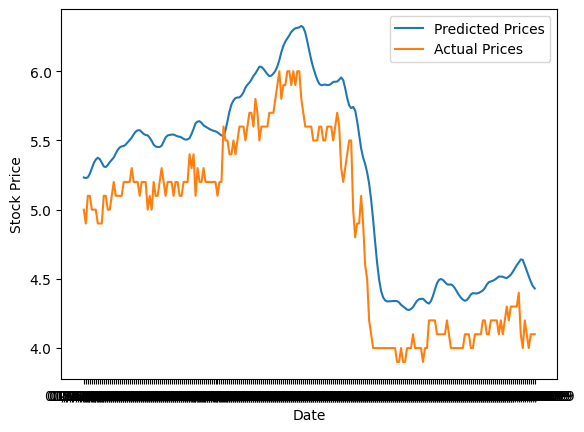

In [14]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Plot the results
plt.plot(data['Date'][split_index + time_steps:], predicted_stock_prices, label='Predicted Prices')
plt.plot(data['Date'][split_index + time_steps:], scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)),
         label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# **Comparison of the Predicted Prices with the Actual Prices**

In [15]:
# Combine actual and predicted prices into a DataFrame for easier printing
results_df = pd.DataFrame({
    'Date': data['Date'][split_index + time_steps:],
    'Actual Prices': scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)).flatten(),
    'Predicted Prices': predicted_stock_prices.flatten()
})

# Print the DataFrame
print(results_df)


            Date  Actual Prices  Predicted Prices
954   01/06/2020            5.0          5.232300
955   01/03/2020            4.9          5.228689
956   01/02/2020            5.1          5.232962
957   12/31/2019            5.1          5.258938
958   12/30/2019            5.0          5.298639
...          ...            ...               ...
1176  02/01/2019            4.1          4.558400
1177  01/31/2019            4.0          4.522120
1178  01/30/2019            4.1          4.480132
1179  01/29/2019            4.1          4.448960
1180  01/28/2019            4.1          4.430933

[227 rows x 3 columns]


# **Assess the performance of the model by computing the Root Mean Squared Error (RMSE)**

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions on the test data
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Inverse transform the original test data for comparison
actual_stock_prices = scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1))

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_stock_prices, predicted_stock_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

8/8 [==============================] - 0s 5ms/step
Root Mean Squared Error (RMSE): 0.3921468461850999
